In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from ipywidgets.embed import embed_minimal_html as export




In [40]:
Unemployment_data = pd.read_csv("../output_data/clean_data/unemployment_clean.csv")


In [41]:
#Cut Index to 2016-2020
#Unemployment_data_cut 
#Index 296-354

Unemployment_data_cut = Unemployment_data.iloc[294:353]
Unemployment_data_cut.head()

,Date,Month,Year,Australia ; Employed total ; Persons ;,Australia ; Employed total ; > Males ;,Australia ; Employed total ; > Females ;,Australia ; > Employed full-time ; Persons ;,Australia ; > Employed full-time ; > Males ;,Australia ; > Employed full-time ; > Females ;,Australia ; > Employed part-time ; Persons ;,...,> Australian Capital Territory ; Labour force total ; > Females ;,> Australian Capital Territory ; Participation rate ; Persons ;,> Australian Capital Territory ; Participation rate ; > Males ;,> Australian Capital Territory ; Participation rate ; > Females ;,> Australian Capital Territory ; Not in the labour force (NILF) ; Persons ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Males ;,> Australian Capital Territory ; Not in the labour force (NILF) ; > Females ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; Persons ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Males ;,> Australian Capital Territory ; Civilian population aged 15 years and over ; > Females ;
294,Jan-16,Jan,2016,11759.6,6328.5,5431.2,8155.1,5208.9,2946.3,3604.5,...,111.9,70.9,73.9,68.1,92.9,40.5,52.4,319.7,155.4,164.3
295,Feb-16,Feb,2016,11975.9,6418.3,5557.6,8296.0,5283.0,3013.0,3679.9,...,111.9,70.2,72.5,68.0,95.5,42.8,52.7,320.3,155.7,164.6
296,Mar-16,Mar,2016,11945.5,6399.3,5546.2,8165.6,5210.0,2955.6,3779.9,...,112.1,70.3,72.8,68.0,95.3,42.5,52.8,321.0,156.0,165.0
297,Apr-16,Apr,2016,11968.5,6401.0,5567.6,8147.6,5170.0,2977.6,3820.9,...,111.6,70.4,73.4,67.6,95.1,41.6,53.5,321.3,156.1,165.1
298,May-16,May,2016,11999.9,6420.8,5579.1,8170.8,5194.6,2976.2,3829.2,...,111.6,70.6,73.9,67.5,94.5,40.8,53.7,321.5,156.2,165.3


In [42]:
#Select Male/Female Unemployment Rate Columns
Vic_M = Unemployment_data_cut["> Victoria ;  Unemployment rate ;  > Males ;"]

Vic_F = Unemployment_data_cut["> Victoria ;  Unemployment rate ;  > Females ;"]

WA_M = Unemployment_data_cut["> Western Australia ;  Unemployment rate ;  > Males ;"]

WA_F = Unemployment_data_cut["> Western Australia ;  Unemployment rate ;  > Females ;"]

QLD_M = Unemployment_data_cut["> Queensland ;  Unemployment rate ;  > Males ;"]

QLD_F = Unemployment_data_cut["> Queensland ;  Unemployment rate ;  > Females ;"]

In [43]:
#Create Function for setting x and plotting
#x = length of date column
#3 Graphs for each state comparing unemployment over time for male and female line.
Time = Unemployment_data_cut["Date"]
def make_line(m,f,ylab,title):
    fig = plt.figure()
    ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
    
    plt.plot(Time,m, '-b',label = 'Male')
    plt.plot(Time,f,'-r',label='Female')

    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel(ylab)
    plt.legend(loc= 'upper left')
    s,p = stats.ttest_ind(m,f)
    covid_line = plt.axvline(x=49,color = 'g',linestyle='--')
    covid_line.set_label('COVID-19 officially a pandemic')
    ax.legend()
    plt.text(0.2, 0.1, f"p_value = {round(p,5)}", horizontalalignment='center',verticalalignment='top', transform=ax.transAxes)

    ax.set_xticks([1,7,13,19,25,31,37,43,49,55,61])
    ax.set_xticklabels(['Jan-2016','July-2016','Jan-2017','July-2017','Jan-2018','July-2018','Jan-2019','July-2019','Jan-2020','July-2020'])
    plt.xticks(rotation=45)

    
    
    
    #Independant sample t-test (is the difference between males/females significant)


    



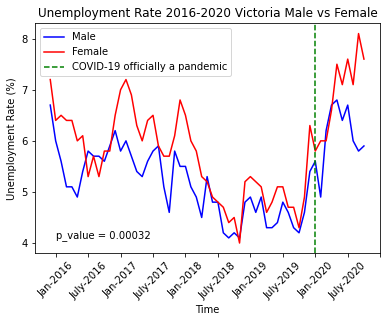

In [44]:
make_line(Vic_M,Vic_F,"Unemployment Rate (%)","Unemployment Rate 2016-2020 Victoria Male vs Female")

plt.savefig('../Graph_Outputs/Vic_Gender.png')
plt.show()

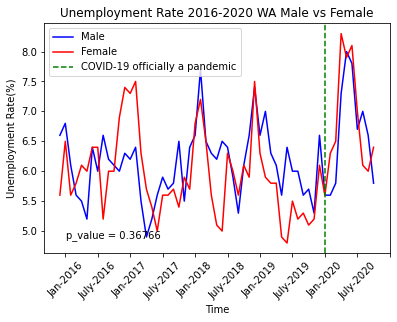

In [47]:
make_line(WA_M,WA_F,"Unemployment Rate(%)","Unemployment Rate 2016-2020 WA Male vs Female")


plt.savefig('../Graph_Outputs/NSW_Gender.png')
plt.show()

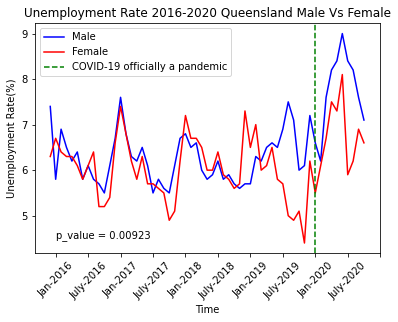

In [48]:
make_line(QLD_M,QLD_F,"Unemployment Rate(%)","Unemployment Rate 2016-2020 Queensland Male Vs Female")

plt.savefig("../Graph_Outputs/QLD_Gender.png")
plt.show()